<a href="https://colab.research.google.com/github/chsrtian/image_classification/blob/main/Roble_Christian_LW1_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Load the Fashion MNIST **Dataset**


In [2]:
from tensorflow import keras

# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)
print("Sample labels:", train_labels[:10])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Sample labels: [9 0 0 3 0 2 7 2 5 5]


Visualize Sample Images

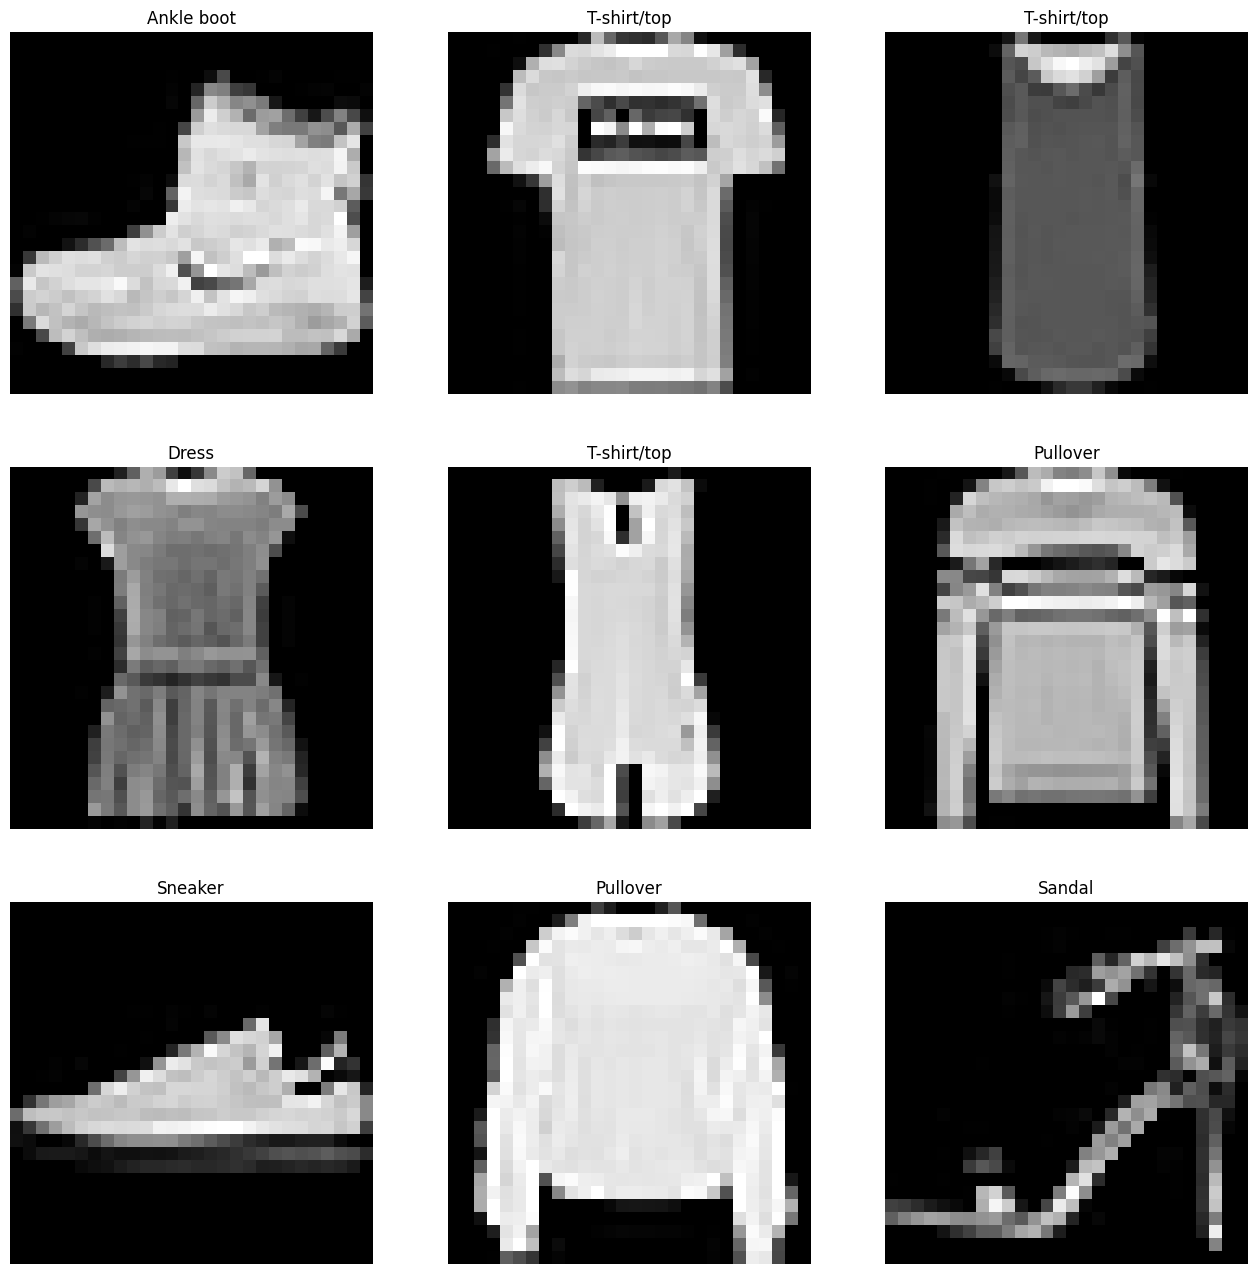

In [3]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
plt.figure(figsize=(16,16))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_names[train_labels[i]])
  plt.axis('off')

plt.show()

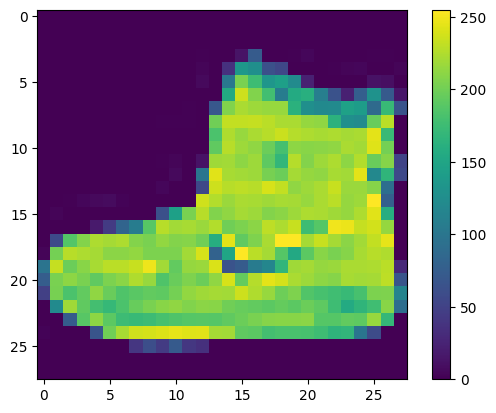

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Part 2 — Model Building, Training & **Evaluation**

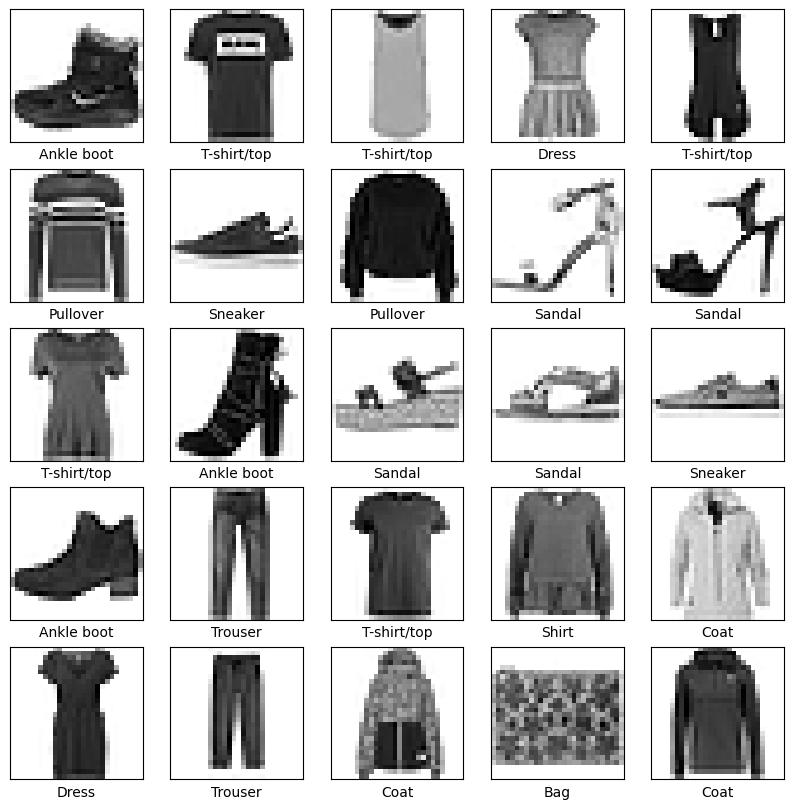

In [5]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

Build the Neural Network Model

In [6]:
from tensorflow.keras import layers
model = keras.Sequential([
layers.Flatten(input_shape=(28, 28)),
layers.Dense(128, activation='relu'),
layers.Dense(10)
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Compiling the **Model**

In [7]:
model.compile(
optimizer='adam',
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']
)

Training the **Model**

In [8]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7828 - loss: 0.6261
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8633 - loss: 0.3835
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8765 - loss: 0.3423
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8867 - loss: 0.3127
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8924 - loss: 0.2894
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8968 - loss: 0.2777
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9020 - loss: 0.2652
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9054 - loss: 0.2534
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9089 - loss: 0.2445
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9127 - loss: 0.2347


Evaluating the **Model**

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8790 - loss: 0.3439

Test accuracy: 0.8790000081062317


Making the **Prediction**

In [10]:
import numpy as np
probability_model = keras.Sequential([
model,
layers.Softmax()
])
predictions = probability_model.predict(test_images)
print("Predicted label for first image:", np.argmax(predictions[0]))
print("Actual label:", test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 9
Actual label: 9


Define functions to graph the full set of 10 class **predictions**

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)

  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verifiying **Prediction**

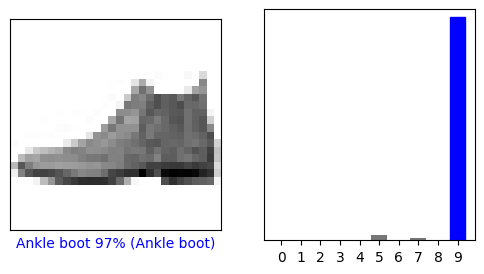

In [12]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

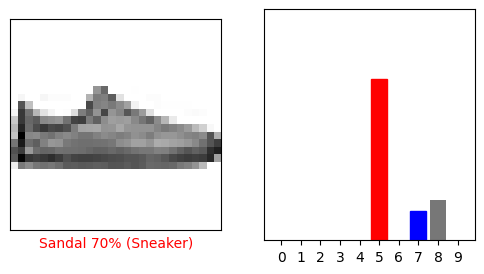

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Plot Several **Images**

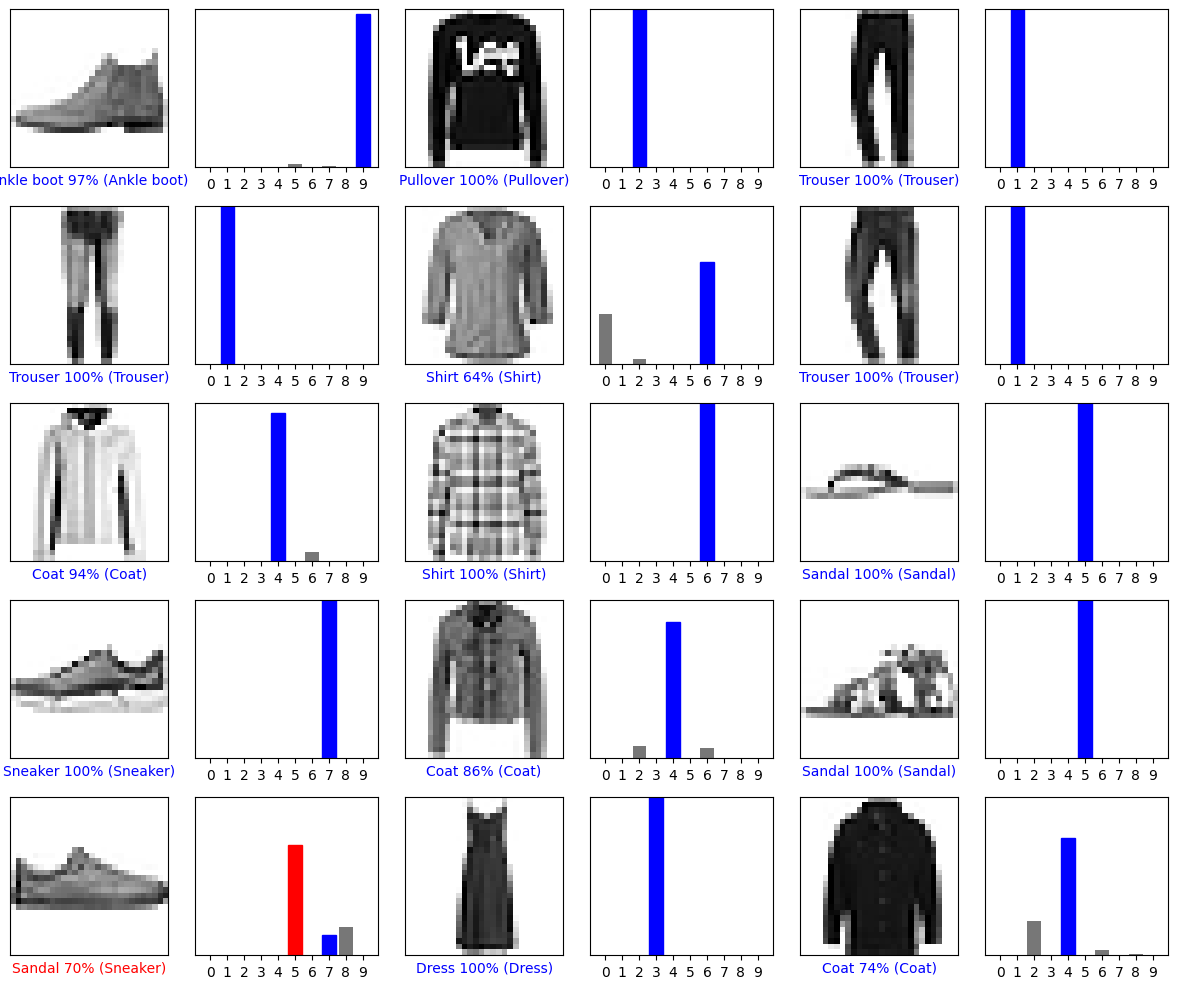

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

Using the Trained **Model**

In [16]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [17]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [18]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[1.7359435e-04 2.3086461e-14 9.9894232e-01 1.9663852e-12 8.1797212e-04
  2.9136153e-09 6.6116219e-05 2.3883940e-11 3.8432827e-08 3.9877410e-11]]


In [19]:
np.argmax(predictions_single[0])

np.int64(2)

Tasks **Enhancement**

In [20]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [21]:
from tensorflow import keras

# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Training data shape:", train_images.shape)
print("Testing data shape:", test_images.shape)
print("Sample labels:", train_labels[:10])

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Sample labels: [9 0 0 3 0 2 7 2 5 5]


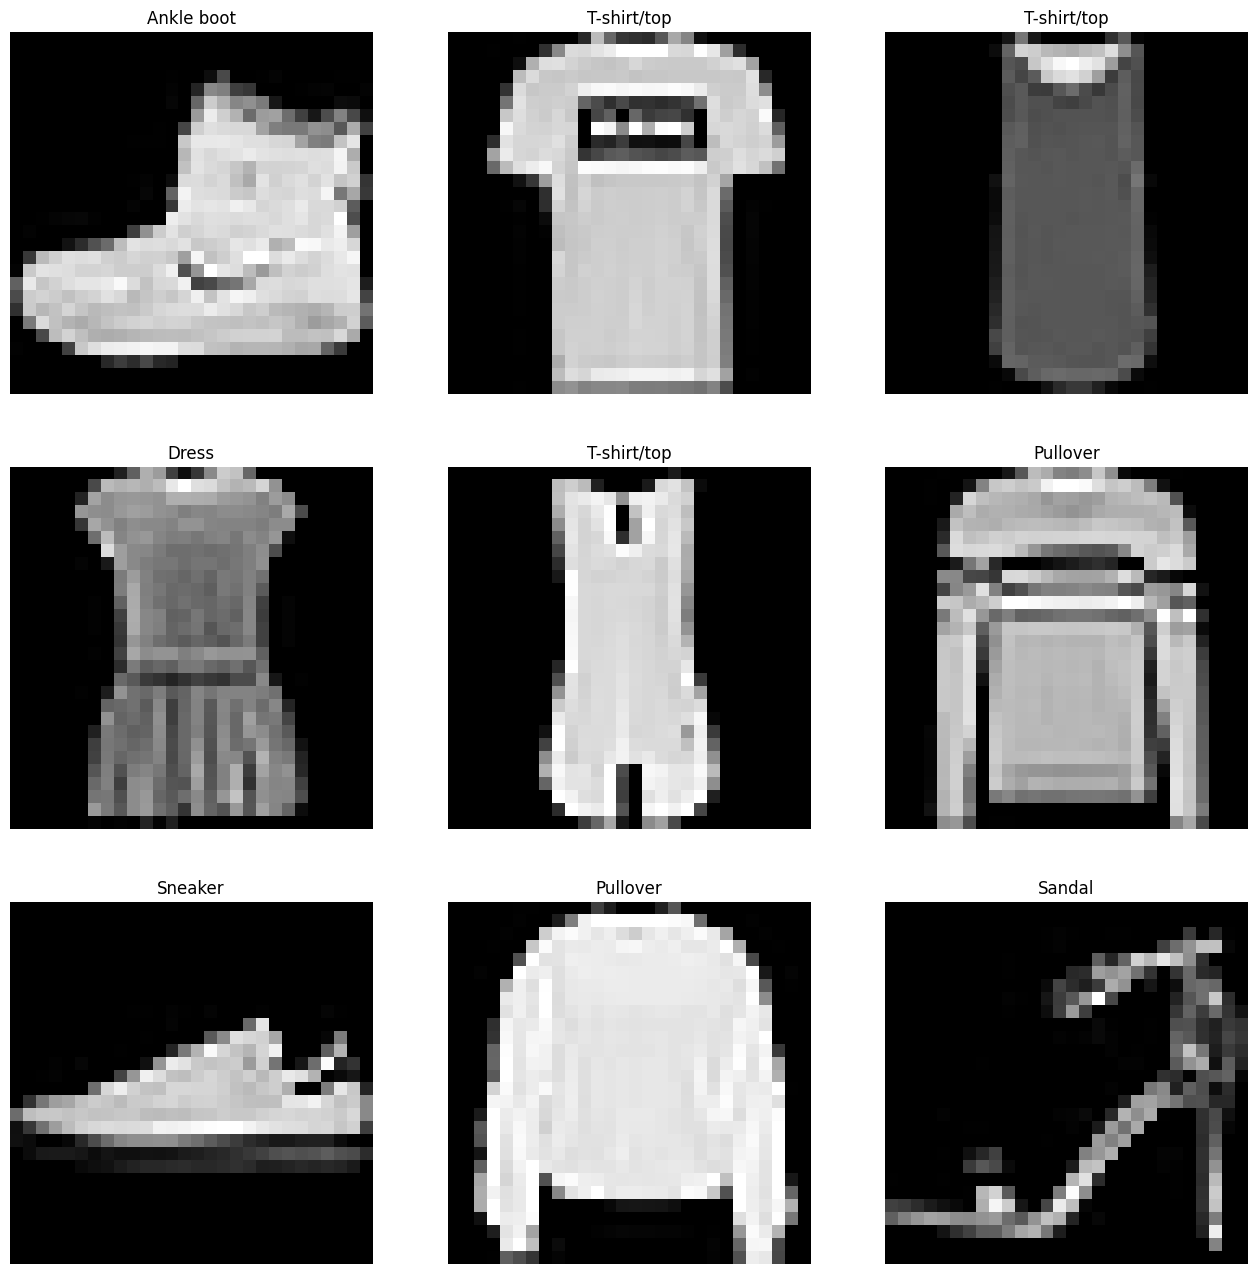

In [22]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
plt.figure(figsize=(16,16))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(class_names[train_labels[i]])
  plt.axis('off')

plt.show()

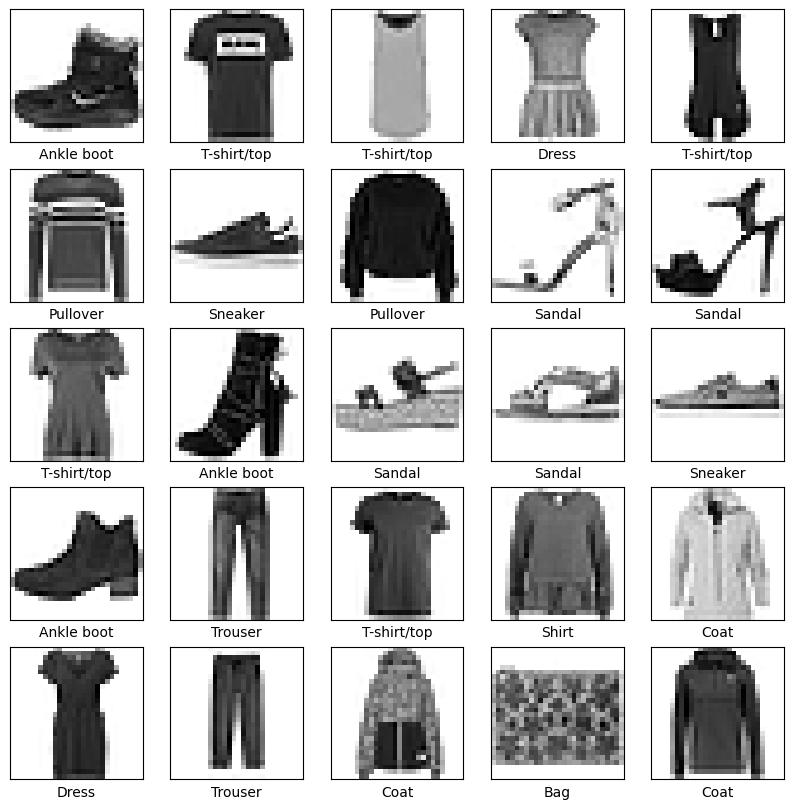

In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

`Change the number of neurons in the hidden layer (e.g., 64 or 256) and retrain the model.`

In [40]:
model_1 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

In [41]:
model_1.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

**Training the Model with 1 hidden layer**

In [42]:
model_1.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7928 - loss: 0.5958
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8638 - loss: 0.3728
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8786 - loss: 0.3320
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8886 - loss: 0.3053
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8951 - loss: 0.2857
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9005 - loss: 0.2683
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9044 - loss: 0.2572
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9082 - loss: 0.2457
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9169 - loss: 0.2276
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9180 - loss: 0.2213
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9186 - loss: 0.2160
Epoch 12/40
1875/18

Evaluating 1-HIDDEN-LAYER **MODEL**

In [43]:
test_loss_1, test_acc_1 = model_1.evaluate(
    test_images, test_labels, verbose=2
)
print("MODEL 1 (1 hidden layer) TEST ACC:", test_acc_1)

313/313 - 1s - 3ms/step - accuracy: 0.8917 - loss: 0.4669
MODEL 1 (1 hidden layer) TEST ACC: 0.891700029373169


**Add another hidden layer and compare the results.**

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the NEW model**

In [33]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

**Train the NEW model**

In [34]:
history_new = model.fit(
    train_images,
    train_labels,
    epochs=40,
    validation_data=(test_images, test_labels)
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7850 - loss: 0.6090 - val_accuracy: 0.8257 - val_loss: 0.4796
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8636 - loss: 0.3686 - val_accuracy: 0.8619 - val_loss: 0.3813
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8800 - loss: 0.3243 - val_accuracy: 0.8580 - val_loss: 0.3935
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8884 - loss: 0.3021 - val_accuracy: 0.8693 - val_loss: 0.3668
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8943 - loss: 0.2875 - val_accuracy: 0.8749 - val_loss: 0.3503
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8994 - loss: 0.2659 - val_accuracy: 0.8758 - val_loss: 0.3420
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9007 - loss: 0.2600 - val_accuracy: 0.8822 - val_loss: 0.3315
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9067 - loss: 0

**Evaluate the NEW model with 2 hidden layers**

In [35]:
test_loss_new, test_acc_new = model.evaluate(
    test_images,
    test_labels,
    verbose=2
)

print("NEW model test accuracy:", test_acc_new)


313/313 - 1s - 2ms/step - accuracy: 0.8935 - loss: 0.5378
NEW model test accuracy: 0.8934999704360962
